In [58]:
import numpy as np
import matplotlib.pyplot as plt
import icf
import scipy.interpolate as interpolate
xd, yd = icf.load_2col("Second_data.csv")


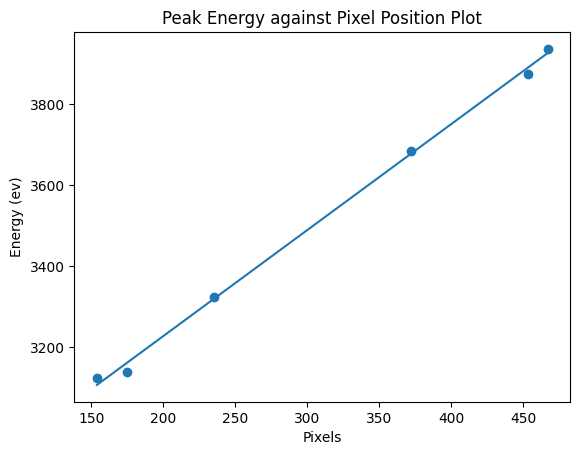

2.6161790950524413


In [64]:
peak_energies = [3123.4,3139.3,3322.9,3683.7,3874.4,3935.6]
peam_x_positions = [154,175,235,372,453,467]
coe = np.polyfit(peam_x_positions,peak_energies,deg=1)
f = np.poly1d(coe)
plt.scatter(peam_x_positions,peak_energies)
plt.plot(peam_x_positions,f(peam_x_positions))
plt.title("Peak Energy against Pixel Position Plot")
plt.ylabel("Energy (ev)")
plt.xlabel("Pixels")
plt.show()
print(coe[0])

In [60]:
#interpolation - for intensity
import scipy.interpolate as interpolate
xTE, yTE = icf.load_2col("T(E).dat")
xph, yph = icf.load_2col("photocathode.dat")
xre, yre = icf.load_2col("reflectivity.dat")
TE = interpolate.interp1d(xTE, yTE, kind="linear")
ph = interpolate.interp1d(xTE, yTE, kind="linear")
re = interpolate.interp1d(xTE, yTE, kind="linear")
x_energies = xd*coe[0]+coe[1]


In [61]:
#mask

maskMin = icf.find_closest(x_energies, 3010)
maskMax = icf.find_closest(x_energies, 4000)
print(x_energies)
print(maskMin)
print(maskMax)
x_masked = x_energies[maskMin:maskMax]
print(x_masked[0])
print(x_masked[-1])
yd_masked = yd[maskMin:maskMax]

[-0.00049745 -0.00049704 -0.00049664 -0.00049624 -0.00049583 -0.00049543
 -0.00049503 -0.00049463 -0.00049422 -0.00049382 -0.00049342 -0.00049302
 -0.00049261 -0.00049221 -0.00049181 -0.0004914  -0.000491   -0.0004906
 -0.0004902  -0.00048979 -0.00048939 -0.00048899 -0.00048858 -0.00048818
 -0.00048778 -0.00048738 -0.00048697 -0.00048657 -0.00048617 -0.00048576
 -0.00048536 -0.00048496 -0.00048456 -0.00048415 -0.00048375 -0.00048335
 -0.00048295 -0.00048254 -0.00048214 -0.00048174 -0.00048133 -0.00048093
 -0.00048053 -0.00048013 -0.00047972 -0.00047932 -0.00047892 -0.00047851
 -0.00047811 -0.00047771 -0.00047731 -0.0004769  -0.0004765  -0.0004761
 -0.00047569 -0.00047529 -0.00047489 -0.00047449 -0.00047408 -0.00047368
 -0.00047328 -0.00047288 -0.00047247 -0.00047207 -0.00047167 -0.00047126
 -0.00047086 -0.00047046 -0.00047006 -0.00046965 -0.00046925 -0.00046885
 -0.00046844 -0.00046804 -0.00046764 -0.00046724 -0.00046683 -0.00046643
 -0.00046603 -0.00046562 -0.00046522 -0.00046482 -0.0

IndexError: index 0 is out of bounds for axis 0 with size 0

In [47]:
y_corrected = yd_masked/(TE(x_masked)*ph(x_masked)*re(x_masked))

In [ ]:
plt.plot(x_masked,y_corrected,label = "Corrected Intensity", color = "blue")
plt.plot(x_energies,yd*500,label = "Original Intesntiy, * 500", color = "r")
plt.title("Ar K-shell spectrum plot")
plt.xlabel("Energie (ev)")
plt.ylabel("Corrected Intensities")
plt.grid(True, linestyle='--', color='red', alpha=0.2, which='minor')
plt.legend()
plt.minorticks_on()
plt.tick_params(which='minor', length=10)
plt.show()